In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


Reading  data from the CSV file 

In [3]:
data = pd.read_csv(r'/Users/gitahi/fiona/MATERNAL-HEALTH-CARE/Data/Maternal Health Risk Data Set.csv')
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [52]:
def data_shape(data):
    """Simple function to provide the shape of the data"""
    out = print(f"The DataFrame has:\n\t* {data.shape[0]} rows\n\t* {data.shape[1]} columns", '\n')

    return out

In [53]:
# helper function for info of the data 

def data_info(data):
    """Simple function to provide the info of the data"""
    out = print(data.info(), '\n')
    
    return out

In [54]:
# helper function to check for missing values

def data_missing(data):
    """Identify is the data has missing values"""
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in data.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values", '\n')
    else:
        out = print(f"The Data has missing values.", '\n')

    return out

In [55]:
# helper function to check for duplicates

def identify_duplicates(data):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        out = print("The Data has no duplicates", '\n')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        out = print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')

In [56]:
# helper function to check for descriptive stats

def data_describe(data):
    """Simple function to check the descriptive values of the data"""
    out = print(data.describe(), '\n')
    
    return out

In [57]:
# overall function for data understanding

def explore(data):
    """Group of functions to explore data """
    out1 = data_shape(data)
    out2 = data_info(data)
    out3 = data_missing(data)
    out4 = identify_duplicates(data)
    out5 = data_describe(data)
    
    return out1, out2, out3, out4, out5

In [58]:
explore(data)

The DataFrame has:
	* 1014 rows
	* 7 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None 

The Data has no missing values 

The Data has 562 duplicated rows.
This constitutes 55.424% of the data set. 

               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.37

(None, None, None, None, None)


1. **Data Shape and Columns**:
   - The dataset contains 1,014 rows and 7 columns.
   - It's a Pandas DataFrame.
   - The columns in the dataset are named 'Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', and 'RiskLevel'.

2. **Data Types and Missing Values**:
   - 'Age', 'SystolicBP', 'DiastolicBP', 'BS', and 'HeartRate' are numerical columns (integers and floats).
   - 'RiskLevel' is an object (likely a string) and represents a categorical variable.
   - There are no missing values (NaNs) in the dataset, as indicated by "The Data has no missing values."

3. **Duplicate Rows**:
   - The dataset contains 562 duplicated rows, which make up approximately 55.42% of the dataset.

4. **Descriptive Statistics**:
   - The descriptive statistics provide information about the central tendency and variability of the numerical columns.
   - For each numerical column, it provides:
     - `count`: The number of non-null values.
     - `mean`: The mean (average) value.
     - `std`: The standard deviation, which measures the dispersion of values.
     - `min`: The minimum value in the column.
     - `25%`, `50%`, and `75%`: The quartiles, which divide the data into four equal parts. The median (50%) is the middle value.
     - `max`: The maximum value in the column.

For example, you can interpret the descriptive statistics for 'Age' as follows:
- The 'Age' column has 1,014 non-null values.
- The mean age is approximately 29.87 years.
- The standard deviation is roughly 13.47, indicating some variability in ages.
- The minimum age is 10 years, the 25th percentile (Q1) is 19 years, the median (Q2) is 26 years, the 75th percentile (Q3) is 39 years, and the maximum age is 70 years.

This information is valuable for understanding the distribution of your data and identifying potential data quality issues, such as duplicate rows. It also provides context for the subsequent data preprocessing and analysis steps you may want to perform on this dataset.

## Understanding the distribution of numerical features, detecting outliers, and explore relationships between variables

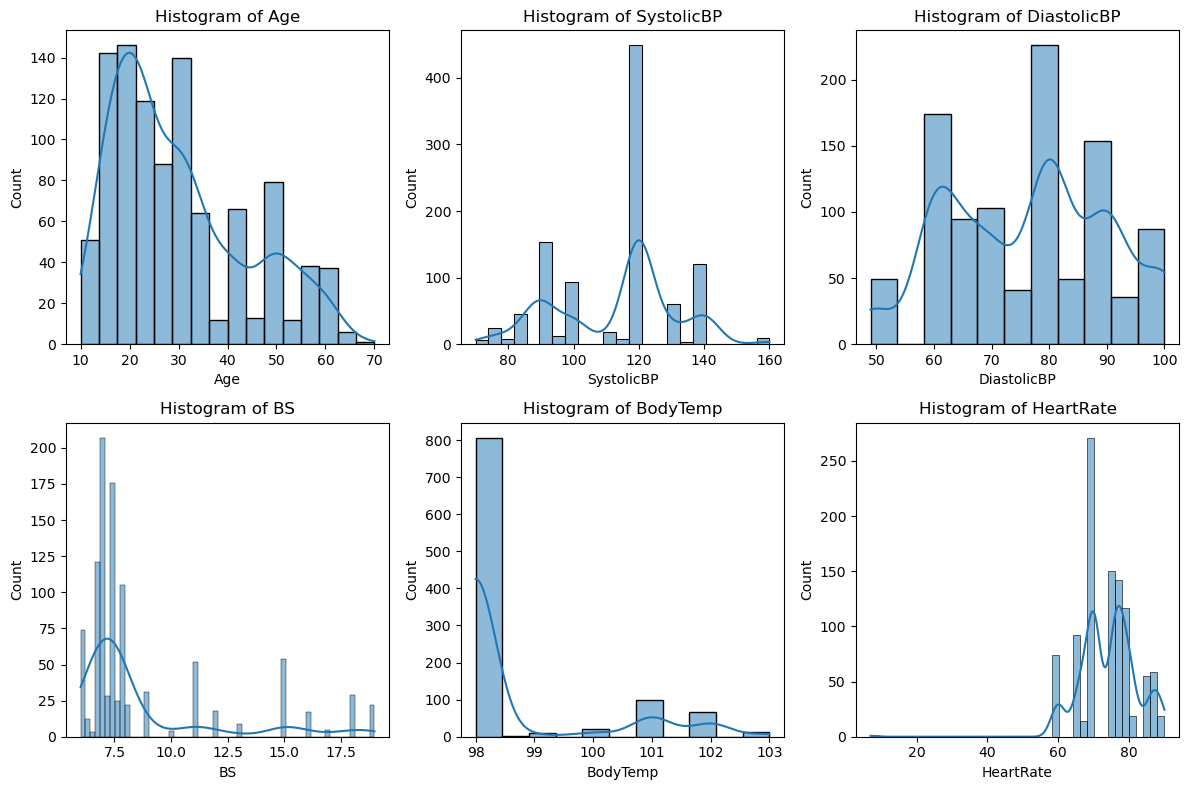

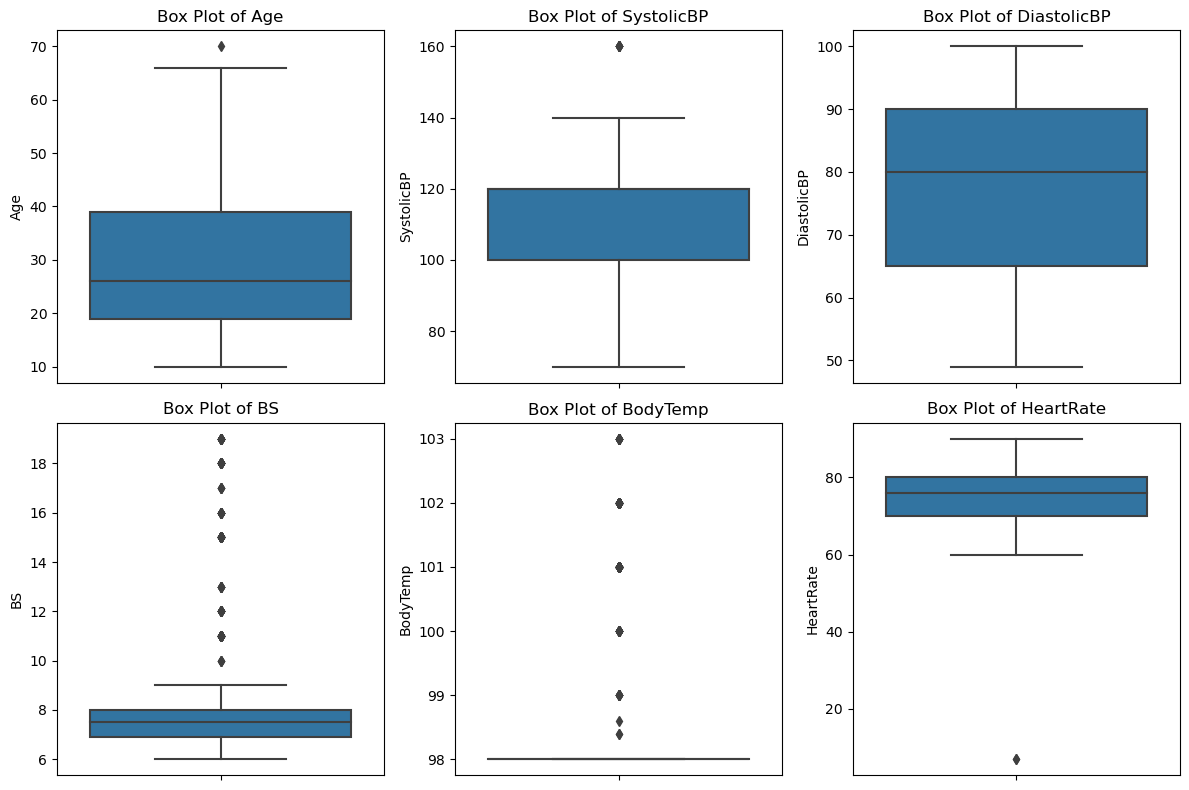

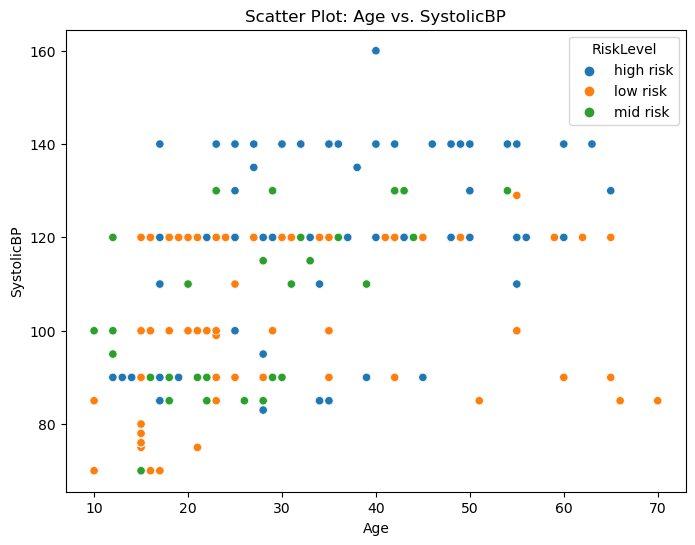

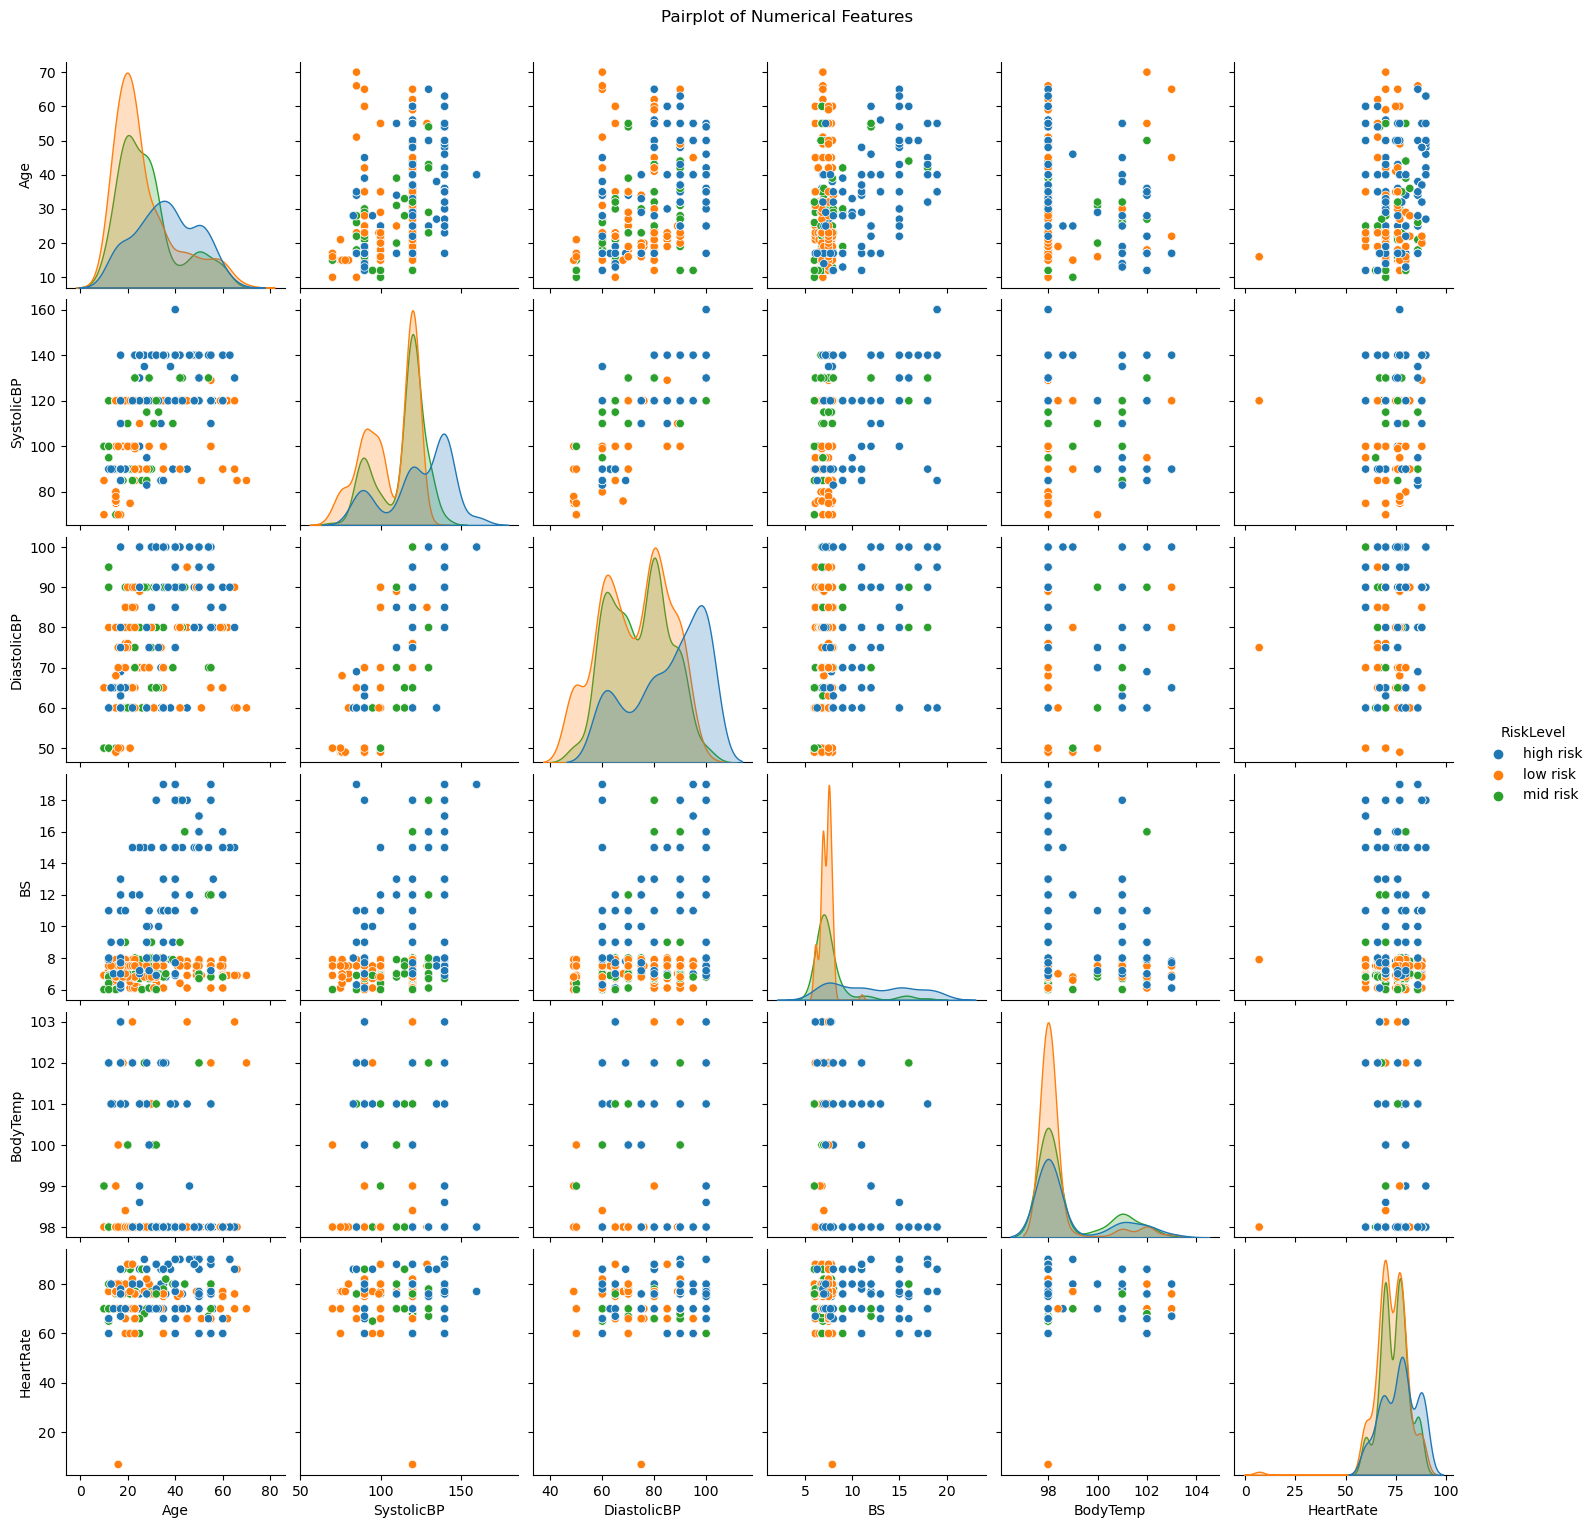

In [59]:
# Histograms for numerical features
numerical_features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

# Box plots for numerical features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=feature, data=data)
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

# Scatter plot for relationships (e.g., Age vs. SystolicBP)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='SystolicBP', data=data, hue='RiskLevel')
plt.title('Scatter Plot: Age vs. SystolicBP')
plt.show()

# Pairplot to visualize relationships among all numerical features
sns.pairplot(data[numerical_features + ['RiskLevel']], hue='RiskLevel')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


## Correlation Matrix: 

Visualizing the correlation between numerical features.


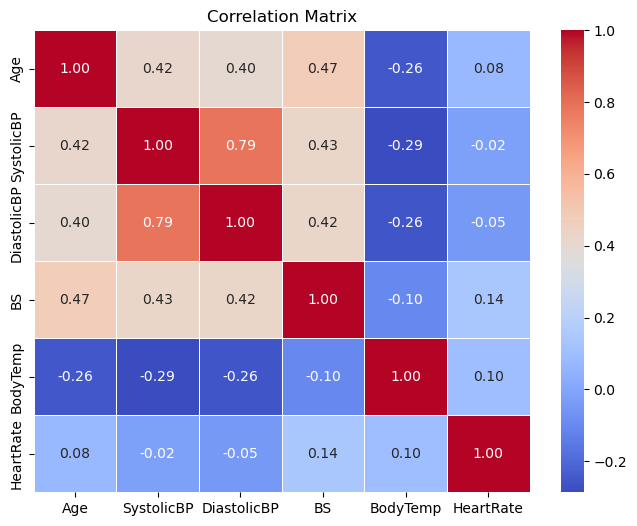

In [60]:
# Correlation matrix
correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


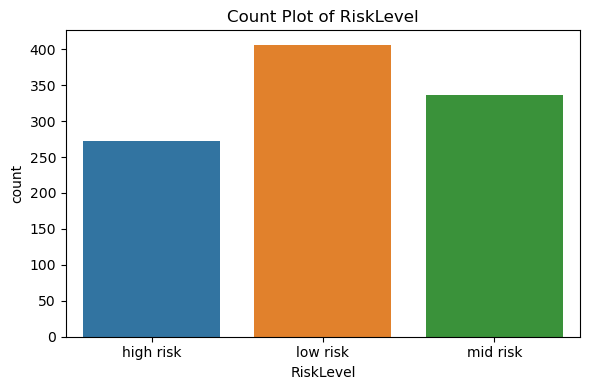

In [61]:
# Count plot for categorical features
categorical_features = ['RiskLevel']
plt.figure(figsize=(6, 4))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 1, i)
    sns.countplot(x=feature, data=data)
    plt.title(f'Count Plot of {feature}')
plt.tight_layout()
plt.show()


Distributions by category

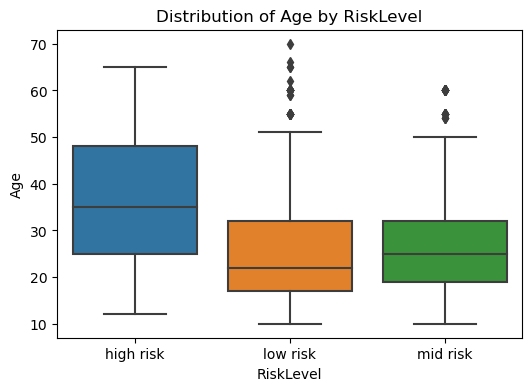

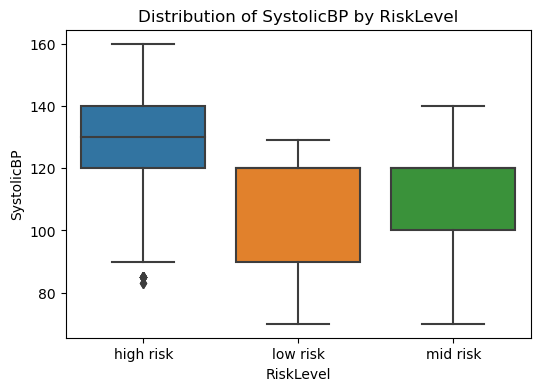

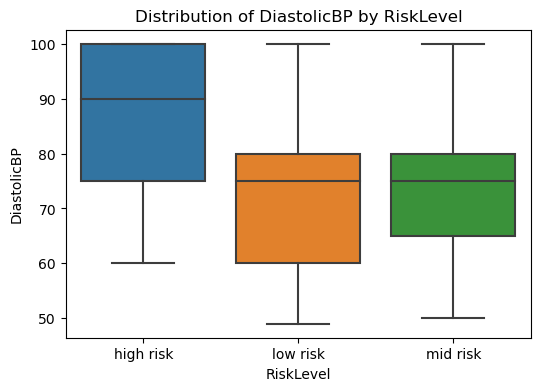

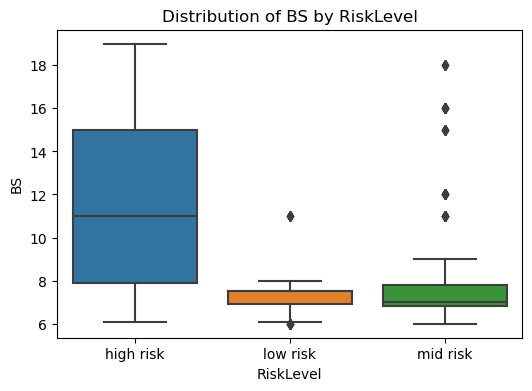

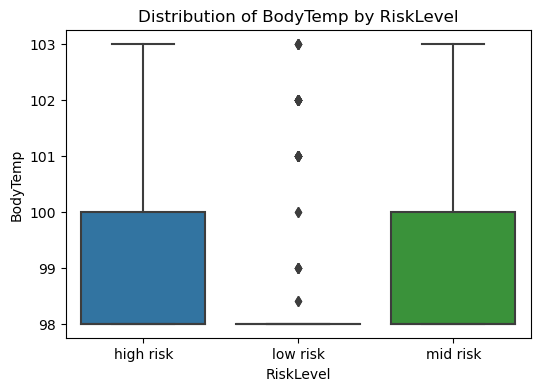

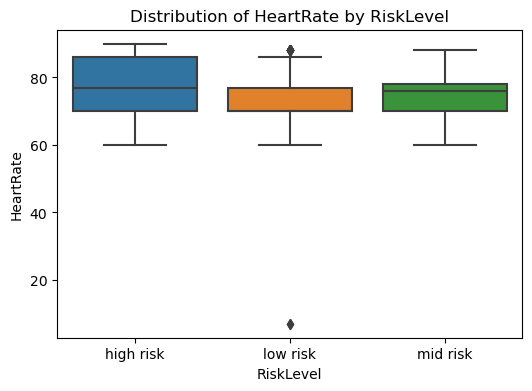

In [62]:
# Distribution of numerical features by RiskLevel
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='RiskLevel', y=feature, data=data)
    plt.title(f'Distribution of {feature} by RiskLevel')
    plt.show()


Getting to see what columns we are working with

In [63]:
print(data.columns)

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')


 Standardizing the numerical features, separating the features from the target variable, and then spliting the dataset into training and testing sets. This prepares the data for machine learning model training and evaluation.

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to numerical features
numerical_features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Select features (X) and target variable (y)
X = data.drop(columns=['RiskLevel'])
y = data['RiskLevel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic regression

Initializing and training a Logistic Regression model using the training data, preparing it to make predictions based on the input features.

In [65]:

from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr_model = LogisticRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

LogisticRegression()

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions on the test set
y_pred = lr_model.predict(X_test)


# Evaluate the model using other metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.6502463054187192

Confusion Matrix:
 [[40  2  5]
 [ 4 71  5]
 [13 42 21]]

Classification Report:
               precision    recall  f1-score   support

   high risk       0.70      0.85      0.77        47
    low risk       0.62      0.89      0.73        80
    mid risk       0.68      0.28      0.39        76

    accuracy                           0.65       203
   macro avg       0.67      0.67      0.63       203
weighted avg       0.66      0.65      0.61       203



The model shows relatively good precision and recall for the low-risk class, indicating that it correctly identifies low-risk cases with high accuracy.

For the high-risk class, the model has good precision but slightly lower recall, suggesting that it is somewhat less sensitive in identifying high-risk cases.

The mid-risk class has the lowest performance metrics, indicating that the model struggles to accurately predict this class.

## Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print the evaluation metrics for the Random Forest model
print("Random Forest Classifier Evaluation:")
print("Accuracy:", accuracy_rf)
print("\nConfusion Matrix:\n", confusion_rf)
print("\nClassification Report:\n", classification_rep_rf)


Random Forest Classifier Evaluation:
Accuracy: 0.812807881773399

Confusion Matrix:
 [[40  1  6]
 [ 3 61 16]
 [ 3  9 64]]

Classification Report:
               precision    recall  f1-score   support

   high risk       0.87      0.85      0.86        47
    low risk       0.86      0.76      0.81        80
    mid risk       0.74      0.84      0.79        76

    accuracy                           0.81       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.81      0.81       203



The Random Forest Classifier performs well in terms of precision, recall, and F1-score for all three risk levels.

The model achieves high precision and recall in identifying high-risk cases.
It has a good balance of precision and recall for low-risk cases.

Mid-risk cases are also well-predicted, with a reasonable balance between precision and recall.

In [73]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='accuracy', cv=5)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


The model has a good balance between precision and recall for both classes (low risk and high risk). It correctly identifies a high percentage of true positives and has a relatively low number of false positives and false negatives.

## Cross Validation

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest Classifier with the best parameters
best_classifier = RandomForestClassifier(random_state=42, **best_params)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_classifier, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()

print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation:", std_accuracy)


Cross-Validation Scores: [0.92118227 0.73891626 0.8226601  0.79802956 0.87623762]
Mean Accuracy: 0.8314051602204555
Standard Deviation: 0.06295154152788053


The model exhibits consistent and relatively high accuracy across different cross-validation folds.

The mean accuracy of approximately 83.14% suggests that the model is likely to perform well on new, unseen data.

The small standard deviation of around 0.063 indicates that the model's performance is stable and not highly sensitive to variations in the training and testing data splits.

**Logistic Regression Model**:
- The logistic regression model achieved an accuracy of 65.02%.
- In terms of precision and recall, the model performed reasonably well, especially for "low risk" cases.
- The confusion matrix shows that the model struggles with correctly identifying "mid-risk" cases.
- The model may benefit from feature engineering and further tuning to improve its performance, especially for the "mid-risk" category.

**Random Forest Classifier Model**:
- The random forest classifier outperformed the logistic regression model with an accuracy of 81.28%.
- It demonstrates better precision, recall, and F1-scores for all three risk categories.
- The confusion matrix indicates that it has relatively balanced performance across all risk levels.
- The model's cross-validation results show consistent and robust performance, with a mean accuracy of approximately 83.14%.

**General Observations**:
- The Random Forest Classifier outperforms the Logistic Regression model in terms of accuracy, precision, and recall.
- It is better at handling imbalanced data across different risk levels.
- However, further hyperparameter tuning and feature engineering may improve both models' performance.
- The choice between the models depends on the specific goals and requirements of the application. If robust performance across different risk levels is crucial, the Random Forest Classifier is a better choice. If simplicity and interpretability are more important, the Logistic Regression model may be preferred.

In conclusion, the Random Forest Classifier shows more promising results for this classification task, with better accuracy and overall performance. Nonetheless, continuous model refinement and domain-specific feature engineering could further enhance the model's predictive power.

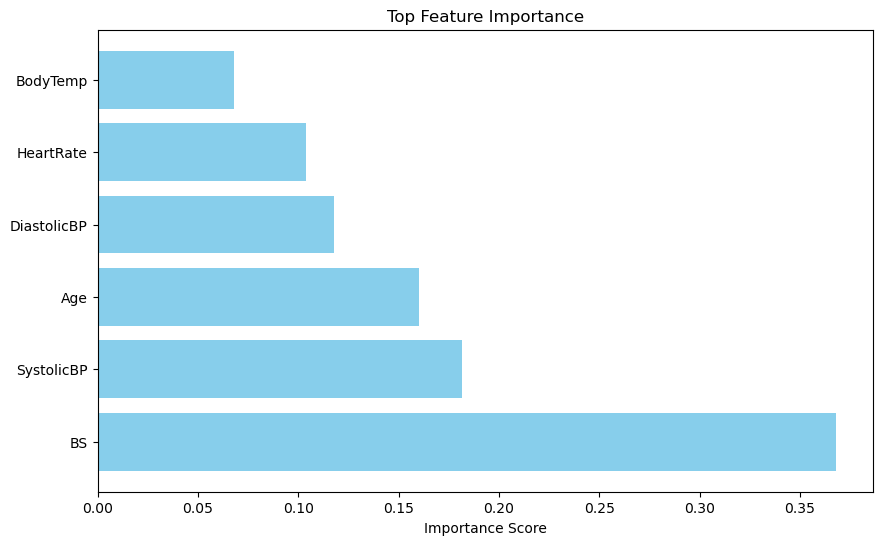

In [92]:
def compute_feature_importance(features,target,model):
    if not isinstance(model, RandomForestClassifier):
        raise ValueError("The model must be a RandomForestClassifier.")

    # Fit the model on the entire dataset to compute feature importance
    
    model.fit(features, target)
    # Get feature importances from the trained model
    importances = model.feature_importances_

    # Create a DataFrame to store feature names and their importance scores
    feature_importance = pd.DataFrame({
        'Feature': features.columns,
        'Importance': importances
    })

    # Sort features by importance in descending order
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    return feature_importance

def visualize_feature_importance(feature_importance, top_n=10):
    # Select the top features
    top_features = feature_importance.head(top_n)

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
    plt.xlabel('Importance Score')
    plt.title('Top Feature Importance')
    plt.show()
    # Example usage:
# Assuming you have already trained a RandomForestClassifier named 'model'
computed_feature_importance = compute_feature_importance(X_train, y_train, rf_classifier)
visualize_feature_importance(computed_feature_importance, top_n=10)

The predictive accuracy for maternal mortality risk is primarily influenced by three key features: **Blood Sugar**, **SystolicBP**, and **age**. These features play the most significant roles in making accurate predictions.